In [1]:
# To reload external files automatically (ex: utils)
%load_ext autoreload
%autoreload 2

import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle # For rectangles
import proplot as plot # New plot library (https://proplot.readthedocs.io/en/latest/)
from scipy import stats # For linregress (trends)
import xesmf as xe # For regridding (https://xesmf.readthedocs.io/en/latest/)

import sys
sys.path.insert(1, '/home/mlalande/notebooks') # to include my util file in previous directory
import utils as u # my personal functions
u.check_python_version()
u.check_virtual_memory()

3.8.2 | packaged by conda-forge | (default, Feb 28 2020, 17:15:22) 
[GCC 7.3.0]
Virtual memory usage - total: 252 GB / available: 159 GB / percent used: 36.6 %


In [2]:
path = '/data/mlalande/MODIS/MOD10CM/netcdf/'

In [3]:
ds = xr.open_mfdataset(path+'*.nc', combine='by_coords')
ds

<xarray.Dataset>
Dimensions:                 (lat: 3600, lon: 7200, time: 63)
Coordinates:
  * lon                     (lon) float64 -180.0 -179.9 -179.9 ... 179.9 180.0
  * lat                     (lat) float64 89.97 89.92 89.87 ... -89.93 -89.97
  * time                    (time) datetime64[ns] 2000-03-16 ... 2005-09-15
Data variables:
    Snow_Cover_Monthly_CMG  (time, lat, lon) float32 dask.array<chunksize=(1, 3600, 7200), meta=np.ndarray>
    Snow_Spatial_QA         (time, lat, lon) float32 dask.array<chunksize=(1, 3600, 7200), meta=np.ndarray>
Attributes:
    HDFEOSVersion:                     HDFEOS_V2.17
    StructMetadata.0:                  GROUP=SwathStructure\nEND_GROUP=SwathS...
    identifier_product_doi:            10.5067/MODIS/MOD10CM.006
    identifier_product_doi_authority:  http://dx.doi.org
    InputFileNames:                    MOD10C1.A2000061.006.2016062172940.hdf...
    CoreMetadata.0:                    \nGROUP                  = INVENTORYME...
    ArchiveMetadata.0:                 \nGROUP                  = ARCHIVEDMET...

In [4]:
latlim=(10,50)
lonlim=(60,110)

In [7]:
Snow_Cover_Monthly_CMG = ds.sel(lat=slice(latlim[1],latlim[0]), lon=slice(lonlim[0],lonlim[1])).Snow_Cover_Monthly_CMG
Snow_Cover_Monthly_CMG

<xarray.DataArray 'Snow_Cover_Monthly_CMG' (time: 63, lat: 800, lon: 1000)>
dask.array<getitem, shape=(63, 800, 1000), dtype=float32, chunksize=(1, 800, 1000), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float64 60.03 60.08 60.13 60.18 ... 109.8 109.9 109.9 110.0
  * lat      (lat) float64 49.97 49.92 49.87 49.82 ... 10.17 10.12 10.07 10.02
  * time     (time) datetime64[ns] 2000-03-16 2000-04-15 ... 2005-09-15
Attributes:
    long_name:             Monthly snow cover extent, 5km
    units:                 none
    format:                I3
    coordsys:              latitude, longitude
    valid_range:           [  0 100]
    Mask_value:            254
    Night_value:           211
    Cell_resolution:       0.05 deg
    Antarctica_snow_note:  Antarctica deliberately mapped as snow
    Key:                   0-100=percent of snow in cell, 211=night, 250=clou...

In [8]:
snc = Snow_Cover_Monthly_CMG.where(Snow_Cover_Monthly_CMG <= 100)
snc

<xarray.DataArray 'Snow_Cover_Monthly_CMG' (time: 63, lat: 800, lon: 1000)>
dask.array<where, shape=(63, 800, 1000), dtype=float32, chunksize=(1, 800, 1000), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float64 60.03 60.08 60.13 60.18 ... 109.8 109.9 109.9 110.0
  * lat      (lat) float64 49.97 49.92 49.87 49.82 ... 10.17 10.12 10.07 10.02
  * time     (time) datetime64[ns] 2000-03-16 2000-04-15 ... 2005-09-15
Attributes:
    long_name:             Monthly snow cover extent, 5km
    units:                 none
    format:                I3
    coordsys:              latitude, longitude
    valid_range:           [  0 100]
    Mask_value:            254
    Night_value:           211
    Cell_resolution:       0.05 deg
    Antarctica_snow_note:  Antarctica deliberately mapped as snow
    Key:                   0-100=percent of snow in cell, 211=night, 250=clou...

/data/mlalande/miniconda3/envs/work/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in less_equal
  return func(*args2)


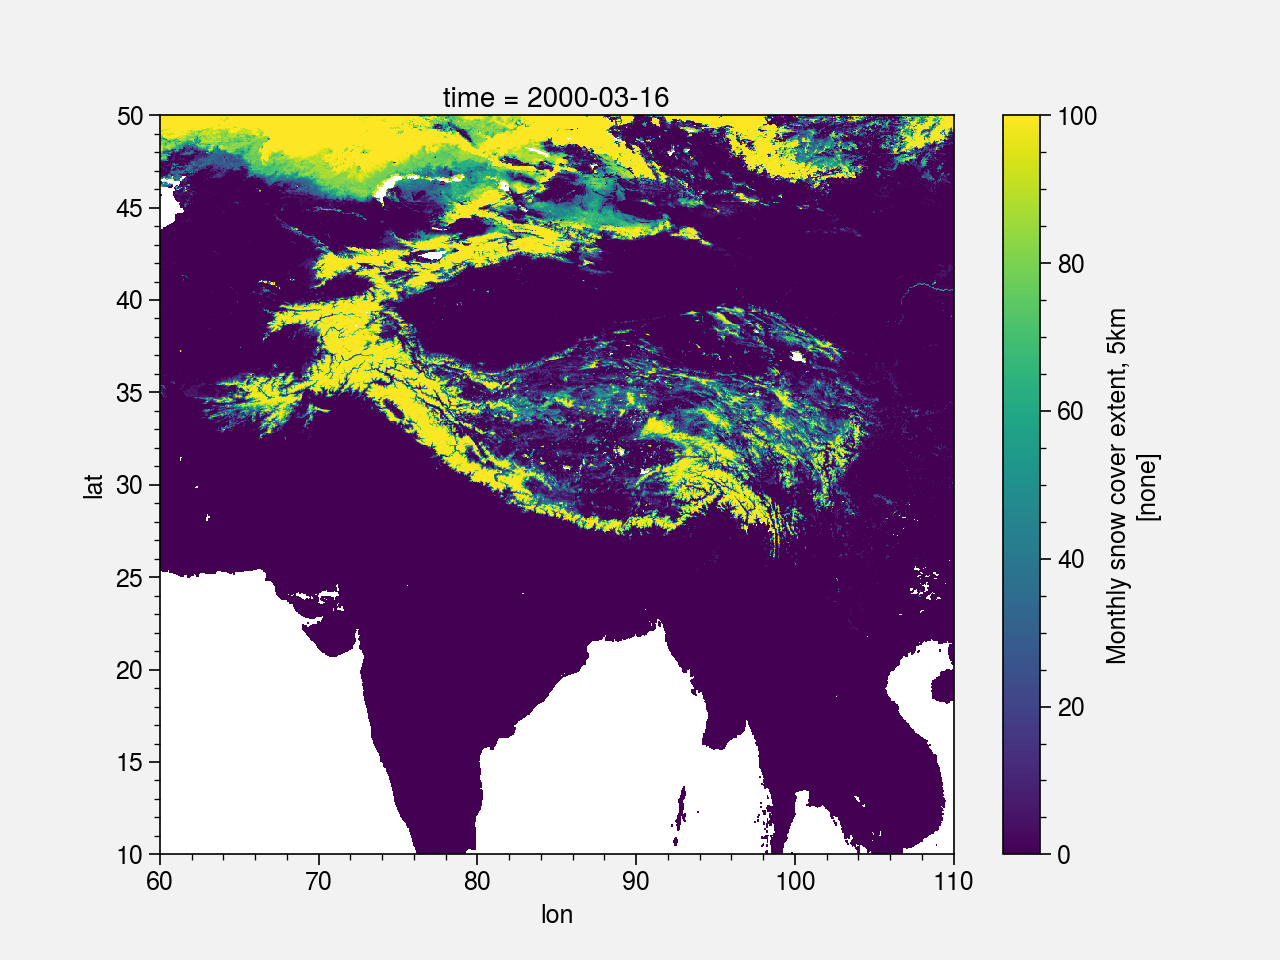

In [10]:
snc[0].plot()

In [ ]:
x = np.arange(0, array.shape[1])
y = np.arange(0, array.shape[0])
#mask invalid values
array = np.ma.masked_invalid(array)
xx, yy = np.meshgrid(x, y)
#get only the valid values
x1 = xx[~array.mask]
y1 = yy[~array.mask]
newarr = array[~array.mask]

GD1 = interpolate.griddata((x1, y1), newarr.ravel(),
                          (xx, yy),
                             method='cubic')

/data/mlalande/miniconda3/envs/work/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in less_equal
  return func(*args2)
/data/mlalande/miniconda3/envs/work/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


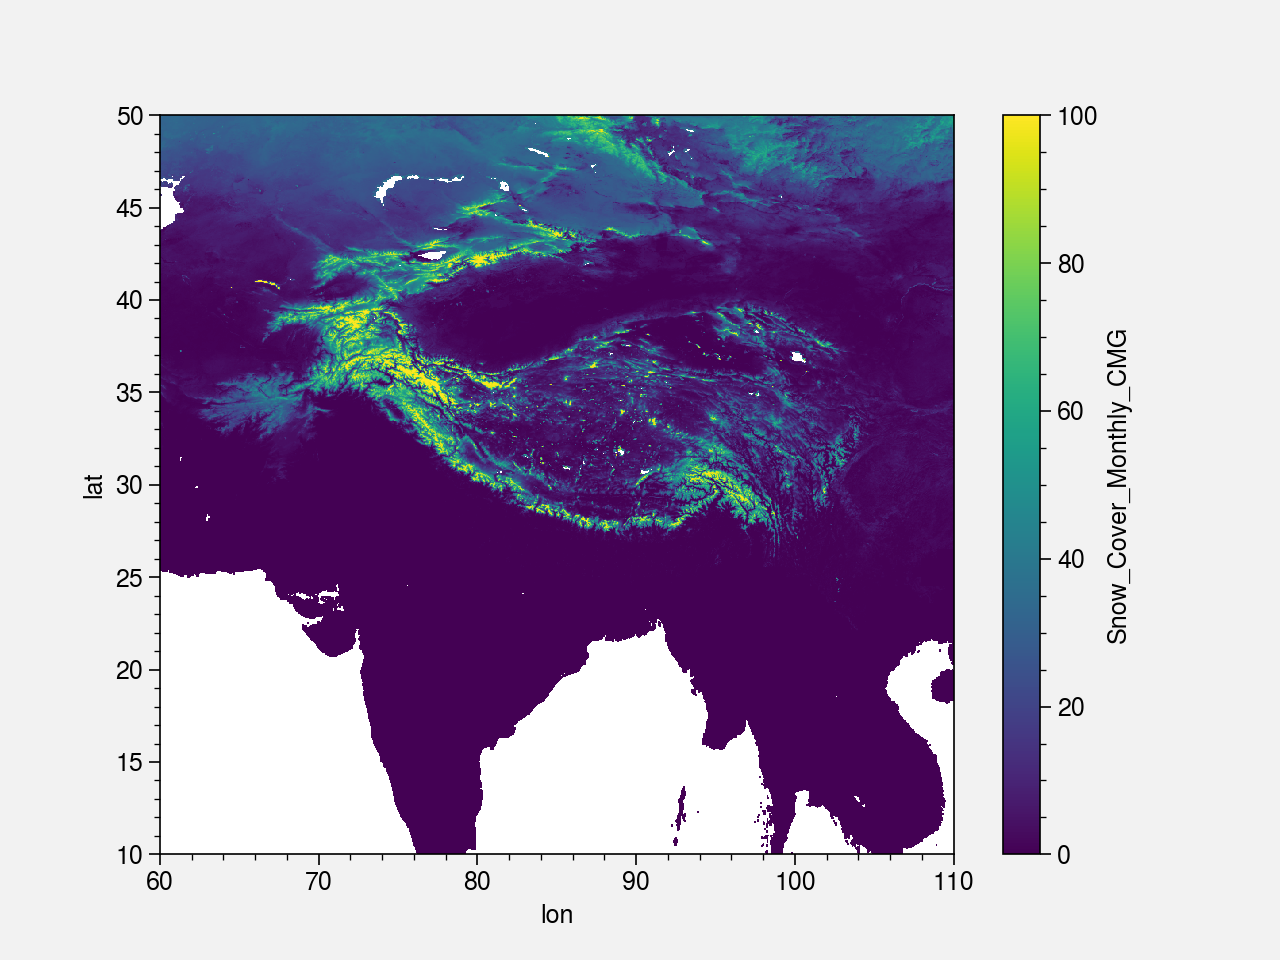

In [18]:
snc.mean('time').plot()

# Check results

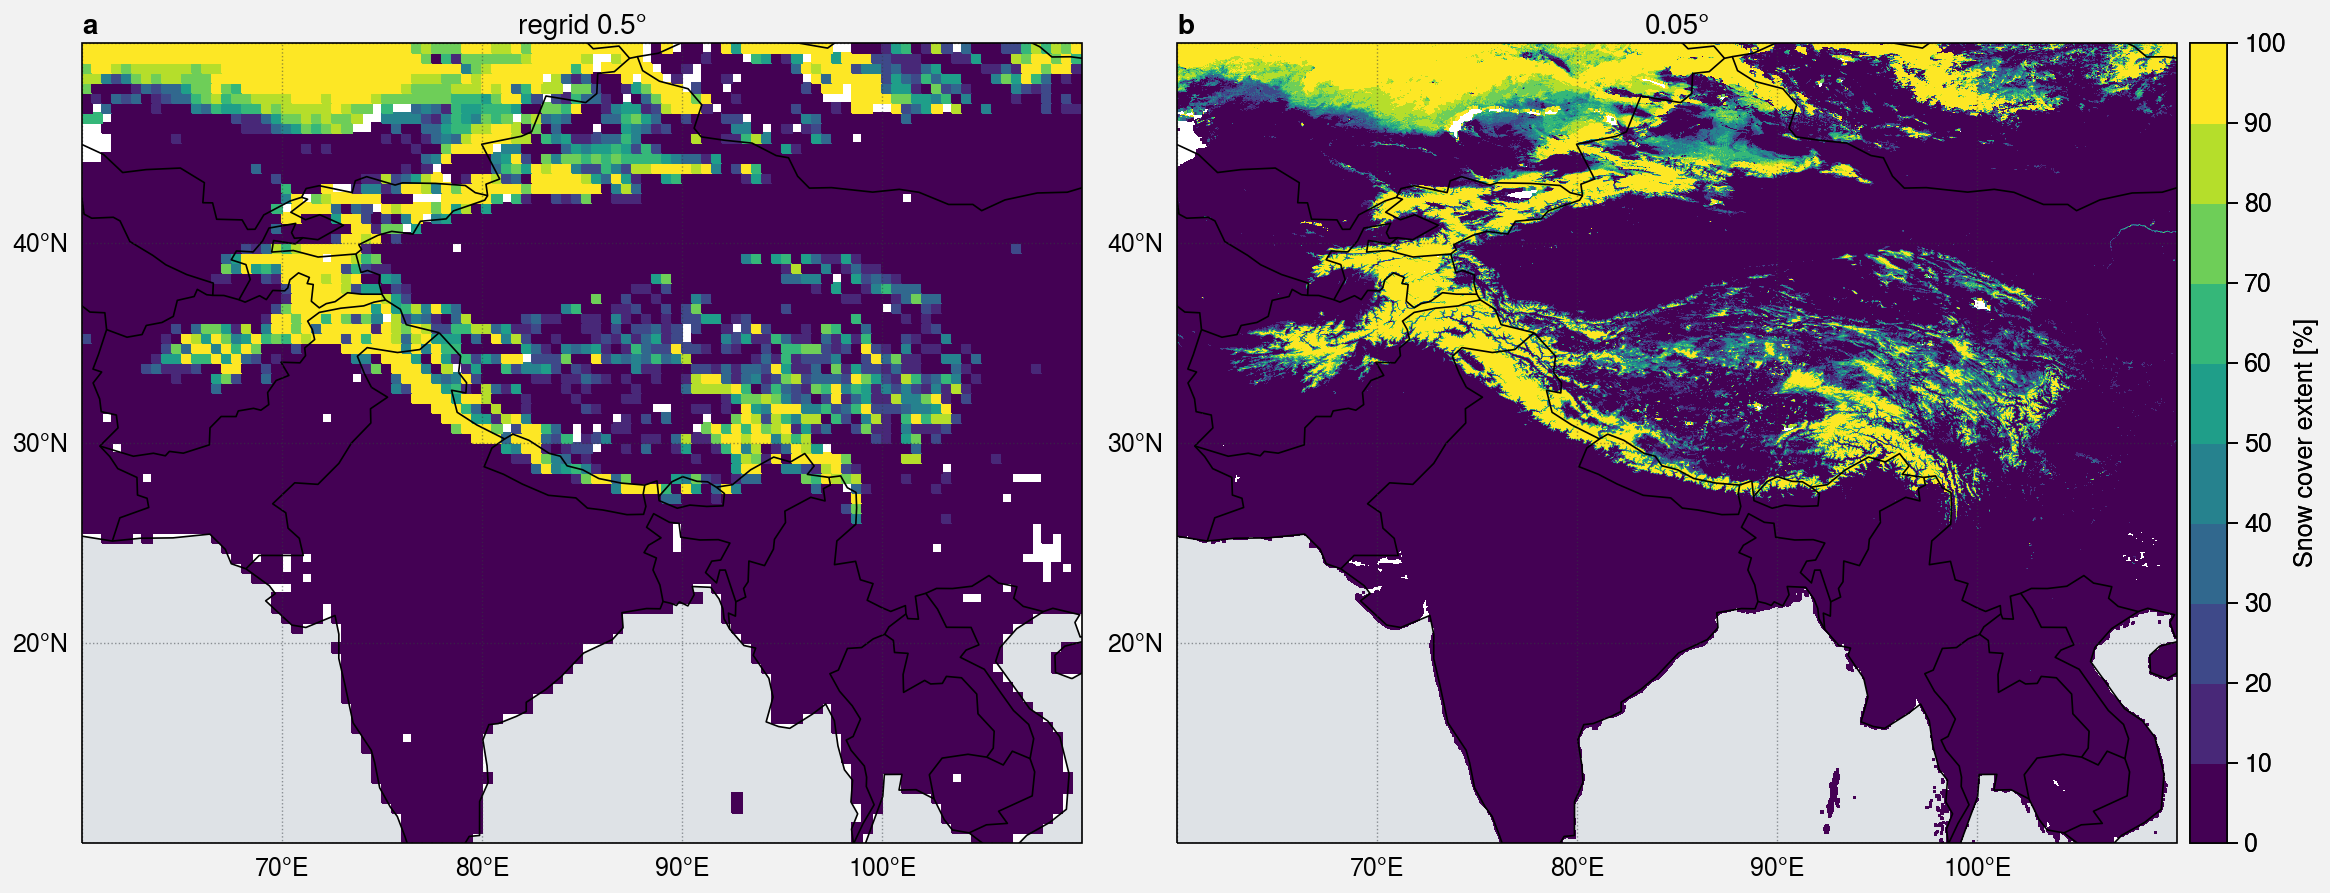

In [32]:
latlim=(10,50)
lonlim=(60,110)

var = 'snc'
label = 'Snow cover extent'
units = '%'
cmap='viridis'
levels=plot.arange(0,100,10)

f, axs = plot.subplots(proj='cyl', ncols=2, nrows=1, axwidth=5)

axs[0].pcolormesh(snc_regrid[0].sel(lat=slice(latlim[0],latlim[1]), lon=slice(lonlim[0],lonlim[1])), cmap=cmap, levels=levels)
axs[0].format(title='regrid 0.5°')

m1 = axs[1].pcolormesh(ds.Snow_Cover_Monthly_CMG.where(ds.Snow_Cover_Monthly_CMG <= 100)[0].sel(lat=slice(latlim[1],latlim[0]), lon=slice(lonlim[0],lonlim[1])), cmap=cmap, levels=levels)
axs[1].format(title='0.05°')
axs[1].colorbar(m1, label=label+ ' ['+units+']')


axs.format(
    geogridlinewidth=0.5, geogridcolor='gray8', geogridalpha=0.5, labels=True, 
    coast=True, ocean=True, oceancolor='gray3', borders=True,
#     suptitle=label+" annual climatology: "+period.start+"-"+period.stop,
    lonlines=10, latlines=10, abc=True, latlim=latlim, lonlim=lonlim
)

In [34]:
ds.Snow_Cover_Monthly_CMG.Key

'0-100=percent of snow in cell, 211=night, 250=cloud, 253=no decision, 254=water mask, 255=fill'

Still some missing values, don't know exactly what it is... I'll try with this hoping that the climatologies will hide this values?